<a href="https://colab.research.google.com/github/AqsaS12/Heart-disease-Prediction/blob/main/Alexgooglenet_128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lib


In [ ]:
import pandas as pd
import numpy as np
dat = pd.read_csv('/content/drive/MyDrive/heart_2020_cleaned.csv')
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319778 non-null  float64
 2   Smoking           319769 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319779 non-null  float64
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319780 non-null  object 
 9   AgeCategory       319773 non-null  object 
 10  Race              319780 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319794 non-null  object 
 13  GenHealth         319777 non-null  object 
 14  SleepTime         319782 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# 30% of Data

In [ ]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named 'data' with a 'target' column containing 0s and 1s.

# Calculate the number of samples to keep from each class.
class_A_count = int(len(dat[dat['HeartDisease'] == 'Yes']) * 0.3)  # Keep 30% of class A
class_B_count = int(len(dat[dat['HeartDisease'] == 'No']) * 0.3)  # Keep 30% of class B

# Filter the data to keep 40% of each class.
data = pd.concat([
    dat[dat['HeartDisease'] == 'Yes'].sample(class_A_count),
    dat[dat['HeartDisease'] =='No'].sample(class_B_count)
])

# Now, 'filtered_data' contains 40% of class A and 40% of class B.

# If you want to shuffle the resulting DataFrame, you can use:
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
percentage_used = (len(data) / len(dat)) * 100
print(f"The percentage of data used is: {percentage_used:.2f}%")

The percentage of data used is: 30.00%


#Data information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95937 entries, 0 to 95936
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      95937 non-null  object 
 1   BMI               95931 non-null  float64
 2   Smoking           95929 non-null  object 
 3   AlcoholDrinking   95937 non-null  object 
 4   Stroke            95937 non-null  object 
 5   PhysicalHealth    95931 non-null  float64
 6   MentalHealth      95937 non-null  int64  
 7   DiffWalking       95937 non-null  object 
 8   Sex               95935 non-null  object 
 9   AgeCategory       95930 non-null  object 
 10  Race              95932 non-null  object 
 11  Diabetic          95937 non-null  object 
 12  PhysicalActivity  95937 non-null  object 
 13  GenHealth         95932 non-null  object 
 14  SleepTime         95934 non-null  float64
 15  Asthma            95937 non-null  object 
 16  KidneyDisease     95937 non-null  object

#Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['HeartDisease'] = label_encoder.fit_transform(data['HeartDisease'])
data['AlcoholDrinking'] = label_encoder.fit_transform(data['AlcoholDrinking'])
data['Smoking'] = label_encoder.fit_transform(data['Smoking'])
data['Stroke'] = label_encoder.fit_transform(data['Stroke'])
data['DiffWalking'] = label_encoder.fit_transform(data['DiffWalking'])
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['AgeCategory'] = label_encoder.fit_transform(data['AgeCategory'])
data['Race'] = label_encoder.fit_transform(data['Race'])
data['Diabetic'] = label_encoder.fit_transform(data['Diabetic'])
data['PhysicalActivity'] = label_encoder.fit_transform(data['PhysicalActivity'])
data['GenHealth'] = label_encoder.fit_transform(data['GenHealth'])
data['Asthma'] = label_encoder.fit_transform(data['Asthma'])
data['KidneyDisease'] = label_encoder.fit_transform(data['KidneyDisease'])
data['SkinCancer'] = label_encoder.fit_transform(data['SkinCancer'])



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95937 entries, 0 to 95936
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      95937 non-null  int64  
 1   BMI               95931 non-null  float64
 2   Smoking           95937 non-null  int64  
 3   AlcoholDrinking   95937 non-null  int64  
 4   Stroke            95937 non-null  int64  
 5   PhysicalHealth    95931 non-null  float64
 6   MentalHealth      95937 non-null  int64  
 7   DiffWalking       95937 non-null  int64  
 8   Sex               95937 non-null  int64  
 9   AgeCategory       95937 non-null  int64  
 10  Race              95937 non-null  int64  
 11  Diabetic          95937 non-null  int64  
 12  PhysicalActivity  95937 non-null  int64  
 13  GenHealth         95937 non-null  int64  
 14  SleepTime         95934 non-null  float64
 15  Asthma            95937 non-null  int64  
 16  KidneyDisease     95937 non-null  int64 

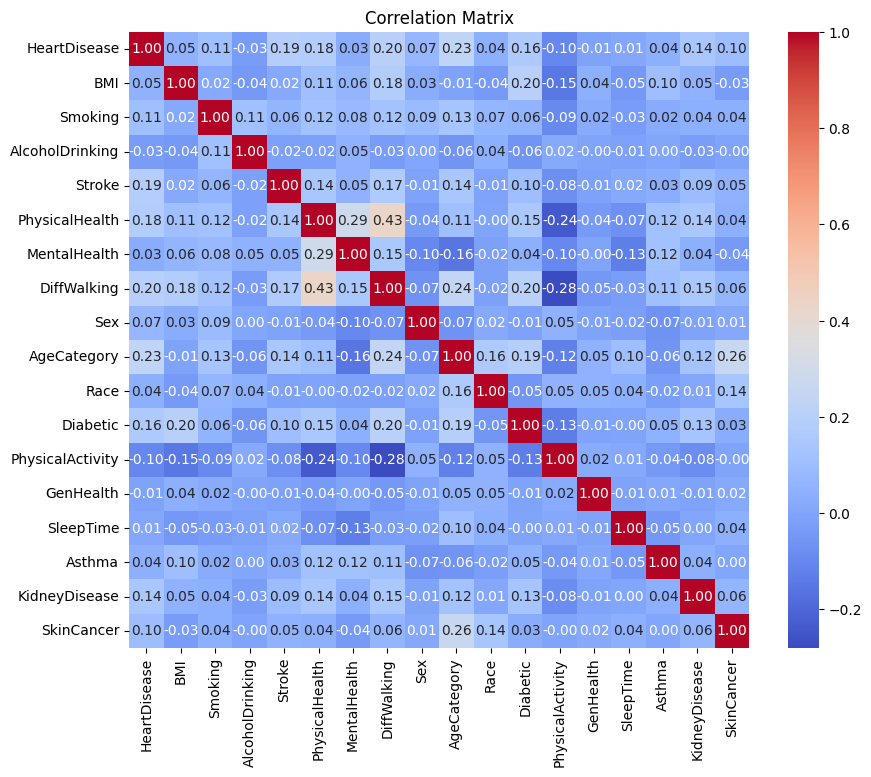

In [ ]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt


# # Calculate the correlation matrix
# correlation_matrix = data.corr()

# # Visualize the correlation matrix using a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()


## **value counts**

In [ ]:
data.HeartDisease.value_counts()

HeartDisease
0    87726
1     8211
Name: count, dtype: int64

# Target variable

In [ ]:
X=data.drop("HeartDisease", axis=1)
y=data["HeartDisease"]

# Null Values

In [ ]:
X.isnull().sum()

BMI                 3
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      1
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           4
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:

X.ffill(inplace=True)


In [ ]:
X.isnull().sum()

BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
float_columns = ['BMI', 'PhysicalHealth', 'SleepTime']

# Converting the float columns to int with rounding
for column in float_columns:
    X[column] = X[column].round().astype(int)

In [ ]:
y.isnull().sum()

0

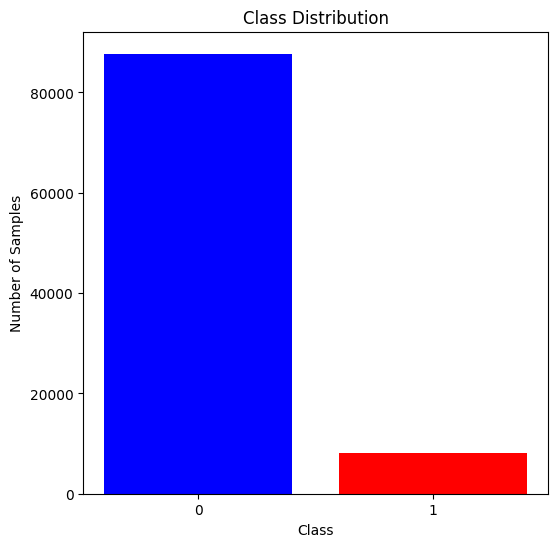

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def plot_class_distribution(y):
    """
    Plots a bar chart showing the distribution of classes in the target column.

    Parameters:
    y (array-like): The target column containing class labels.
    """
    # Calculate the distribution of classes
    class_counts = Counter(y)
    labels, counts = zip(*class_counts.items())

    x_pos = np.arange(len(labels))

    plt.figure(figsize=(6, 6))
    plt.bar(x_pos, counts, color=['blue', 'red'])
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.title('Class Distribution')
    plt.xticks(x_pos, labels)
    plt.show()

# Load your dataset
# Replace 'your_dataset.csv' with the path to your actual dataset
# df = pd.read_csv('your_dataset.csv')

# # Replace 'target_column' with the actual name of your target column
# X = df.drop('target_column', axis=1)
# y = df['target_column']

# If you need to split into training and testing data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the class distribution for the entire dataset or for y_train if split
plot_class_distribution(y)
# plot_class_distribution(y_train)


# Balancing

## Smote variants install

In [ ]:
!pip install -U smote-variants

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.2/416.2 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.0 MB/s eta 0:00:00
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=d5d01a40d1bb47c5dad7848eff07ac8ad07c1eb1a9a06b1f77447ad582dd05cf
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7436 sha256=03c81ce44be3dd4b3c3f2b1e5fbdb728147f07f577f19be8d5470f5a83fcd433
  Stored in directory: /root/.cache/pip/wheels/59/bd/aa/41ad56fbb723d36e457b5be74feb992cdac2855a6999ba34a1
Successfully built minisom statistics


2024-07-17 04:43:55,347:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'random_state': 2, 'class_name': 'MSMOTE'}")
INFO:smote_variants:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'random_state': 2, 'class_name': 'MSMOTE'}")
2024-07-17 04:43:55,356:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2024-07-17 04:43:55,366:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: kneighbors query minkowski


Class Distribution After Oversampling: Counter({0: 87726, 1: 87726})


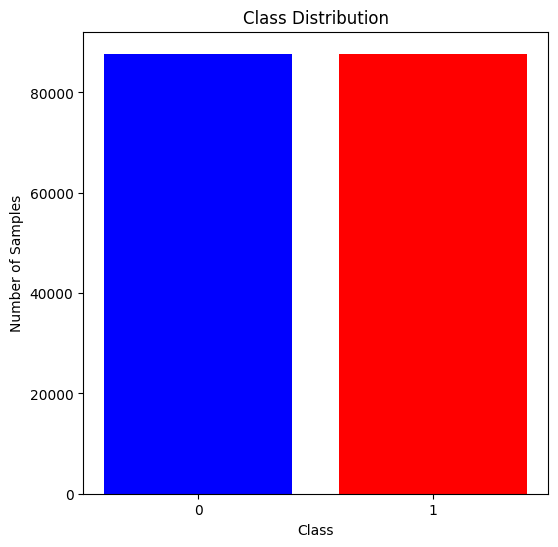

In [ ]:
import smote_variants as sv
import numpy as np
from collections import Counter

# Assuming you have your data X_ and labels y defined
x_np=np.array(X)
y_np=np.array(y)
# Initialize MSMOTE oversampler
oversampler_mysn = sv.MSMOTE(random_state=2)

# Apply ProWSyn oversampling
X_b, y_b = oversampler_mysn.sample(x_np, y_np)

# Check the class distribution after oversampling
class_counts = Counter(y_b)
print("Class Distribution After Oversampling:", class_counts)
plot_class_distribution(y_b)



# Spliting

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_b,y_b,test_size=0.2)
X_train.shape

(140361, 17)

# Imports

In [ ]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from keras.models import Sequential
from tensorflow.keras.layers import  Activation, GlobalAveragePooling1D, concatenate, LayerNormalization, SpatialDropout1D, Input
from tensorflow.keras.models import Model

from keras.layers import Dense, Dropout, GaussianNoise, Conv1D, MaxPooling1D, Flatten
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Scaling

In [ ]:
#Standardizing our training and testing data.
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaledd= scaler.fit_transform(X_train)
X_test_scaledd= scaler.transform(X_test)
# Optional: Convert scaled data back to DataFrame for easier inspection
X_train_scaled = pd.DataFrame(X_train_scaledd, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaledd, columns=X.columns)

print("Scaled Training Data:\n", X_train_scaled)
print("Scaled Test Data:\n", X_test_scaled)

Scaled Training Data:
              BMI   Smoking  AlcoholDrinking    Stroke  PhysicalHealth  \
0      -0.742635 -0.470018         0.000000  0.000000        0.285714   
1      -0.271737  0.529982         0.000000  0.000000        0.000000   
2      -0.639011  0.529982         0.000000  0.000000        0.000000   
3       0.768542  0.529982         0.000000  0.000000        0.000000   
4      -0.964775  0.529982         0.000000  0.000000        0.000000   
...          ...       ...              ...       ...             ...   
140356  0.167681 -0.470018         0.000000  0.000000        0.000000   
140357  1.096360 -0.470018         0.000000  0.000000        0.000000   
140358 -0.060554 -0.470018         0.000000  0.000000        0.000000   
140359 -0.640546  0.079866         0.733873  0.489158        1.142857   
140360 -0.368802  0.529982         0.000000  0.000000        0.000000   

        MentalHealth  DiffWalking       Sex  AgeCategory  Race  Diabetic  \
0           6.666667    

# Classification

## ALEXNET

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from keras.optimizers import Adam
import time

# Define the AlexNet-like model
# # Reshape the input data for 1D convolution
# X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
# X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)


from keras.models import Sequential
alx_model = Sequential([
    Conv1D(128, kernel_size=5, activation='tanh', input_shape=(X_train_scaled.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(8, kernel_size=2, padding='same', activation='tanh'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(8, activation='tanh'),
    Dense(1, activation='sigmoid')
])

# Compile and train the model
# optimizer = tf.keras.optimizers.Adam(lr=1e-3)
alx_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()
alx_model.fit(X_train_scaled, y_train, epochs=20, batch_size=128, validation_split=0.2)
# Model evaluation on the test set
y_pred_alx = alx_model.predict(X_test_scaled)
y_pred = (y_pred_alx > 0.5).astype(int)

# Calculate evaluation metrics
end = time.time()
exe_time = end - start
res_accuracy = accuracy_score(y_test, y_pred)
res_precision = precision_score(y_test, y_pred)
res_recall = recall_score(y_test, y_pred)
res_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {res_accuracy}")
print(f"F1-score: {res_f1}")
print(f"Precision: {res_precision}")
print(f"Recall: {res_recall}")
print(f"Execution Time:{exe_time}")

Epoch 1/20
878/878 [==============================] - 33s 29ms/step - loss: 0.4264 - accuracy: 0.8088 - val_loss: 0.4073 - val_accuracy: 0.8194
Epoch 2/20
878/878 [==============================] - 20s 23ms/step - loss: 0.3993 - accuracy: 0.8228 - val_loss: 0.3982 - val_accuracy: 0.8221
Epoch 3/20
878/878 [==============================] - 13s 15ms/step - loss: 0.3846 - accuracy: 0.8302 - val_loss: 0.3870 - val_accuracy: 0.8284
Epoch 4/20
878/878 [==============================] - 12s 14ms/step - loss: 0.3714 - accuracy: 0.8364 - val_loss: 0.3662 - val_accuracy: 0.8389
Epoch 5/20
878/878 [==============================] - 12s 13ms/step - loss: 0.3599 - accuracy: 0.8417 - val_loss: 0.3627 - val_accuracy: 0.8412
Epoch 6/20
878/878 [==============================] - 12s 14ms/step - loss: 0.3501 - accuracy: 0.8478 - val_loss: 0.3589 - val_accuracy: 0.8400
Epoch 7/20
878/878 [==============================] - 14s 16ms/step - loss: 0.3417 - accuracy: 0.8512 - val_loss: 0.3463 - val_accuracy:

## Googlenet

In [ ]:
import time
from tensorflow.keras.layers import Conv1D, MaxPooling1D, concatenate, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the input layer
input_layer = Input(shape=(X_train_scaled.shape[1], 1))

# Define the towers (branches)
tower_1 = Conv1D(64, 1, padding='same', activation='tanh')(input_layer)
tower_2 = Conv1D(8, 1, padding='same', activation='tanh')(input_layer)
tower_2 = Conv1D(32, 3, padding='same', activation='tanh')(tower_2)
tower_3 = Conv1D(16, 1, padding='same', activation='tanh')(input_layer)
tower_3 = Conv1D(16, 5, padding='same', activation='tanh')(tower_3)
tower_4 = MaxPooling1D(3, strides=1, padding='same')(input_layer)
tower_4 = Conv1D(8, 1, padding='same', activation='tanh')(tower_4)

# Concatenate the towers
output = concatenate([tower_1, tower_2, tower_3, tower_4], axis=-1)
output = Flatten()(output)
output = Dense(16, activation='relu')(output)
output = Dense(16, activation='relu')(output)
output = Dense(4, activation='relu')(output)
output = Dropout(0.5)(output)
# output = Dense(16, activation='tanh')(output)

# Output layer for binary classification with sigmoid activation
output_layer = Dense(1, activation='sigmoid')(output)

# Build the model
custom_inception_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model for binary classification
custom_inception_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()
custom_inception_model.fit(X_train_scaled, y_train, epochs=20, batch_size=128, validation_split=0.2)
end_time = time.time()
execution_time = end_time - start_time

# Predictions and evaluation
y_train_pred = (custom_inception_model.predict(X_train_scaled) > 0.5).astype(int)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = (custom_inception_model.predict(X_test_scaled) > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# print("Training Accuracy:", train_accuracy)
print("Googlenet Accuracy:", test_accuracy)
print("Googlenet Precision:", precision)
print("Googlenet Recall:", recall)
print("Googlenet F1 Score:", f1)
print("Googlenet Execution Time:", execution_time)


Epoch 1/20
878/878 [==============================] - 13s 12ms/step - loss: 0.5389 - accuracy: 0.7315 - val_loss: 0.4245 - val_accuracy: 0.8204
Epoch 2/20
878/878 [==============================] - 10s 11ms/step - loss: 0.5118 - accuracy: 0.7436 - val_loss: 0.4020 - val_accuracy: 0.8333
Epoch 3/20
878/878 [==============================] - 9s 11ms/step - loss: 0.4695 - accuracy: 0.7598 - val_loss: 0.3272 - val_accuracy: 0.8580
Epoch 4/20
878/878 [==============================] - 12s 13ms/step - loss: 0.4418 - accuracy: 0.7684 - val_loss: 0.3134 - val_accuracy: 0.8654
Epoch 5/20
878/878 [==============================] - 11s 12ms/step - loss: 0.4347 - accuracy: 0.7689 - val_loss: 0.3102 - val_accuracy: 0.8668
Epoch 6/20
878/878 [==============================] - 9s 10ms/step - loss: 0.4303 - accuracy: 0.7735 - val_loss: 0.3086 - val_accuracy: 0.8600
Epoch 7/20
878/878 [==============================] - 11s 12ms/step - loss: 0.4274 - accuracy: 0.7743 - val_loss: 0.2972 - val_accuracy: 0

## alexnet-googlnet

In [ ]:
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, concatenate, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the input layer for the AlexNet model
alx_input = Input(shape=(X_train_scaled.shape[1], 1))
alx_model = tf.keras.Sequential([
    Conv1D(128, kernel_size=5, activation='tanh', input_shape=(X_train_scaled.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, padding='same', activation='tanh'),
    MaxPooling1D(pool_size=2),
    Conv1D(8, kernel_size=2, padding='same', activation='tanh'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Extract the output tensor of the AlexNet model
alx_output = alx_model(alx_input)

# Define the input layer for the Inception model
inception_input = Input(shape=(X_train_scaled.shape[1], 1))
tower_1 = Conv1D(64, 1, padding='same', activation='tanh')(inception_input)
tower_2 = Conv1D(8, 1, padding='same', activation='tanh')(inception_input)
tower_2 = Conv1D(128, 3, padding='same', activation='tanh')(tower_2)
tower_3 = Conv1D(16, 1, padding='same', activation='tanh')(inception_input)
tower_3 = Conv1D(16, 5, padding='same', activation='tanh')(tower_3)
tower_4 = MaxPooling1D(3, strides=1, padding='same')(inception_input)
tower_4 = Conv1D(8, 1, padding='same', activation='tanh')(tower_4)

inception_output = concatenate([tower_1, tower_2, tower_3, tower_4], axis=-1)
inception_output = Flatten()(inception_output)
inception_output = Dense(16, activation='relu')(inception_output)
inception_output = Dense(16, activation='relu')(inception_output)
inception_output = Dense(4, activation='relu')(inception_output)
inception_output = Dropout(0.5)(inception_output)
output_layer = Dense(1, activation='sigmoid')(inception_output)

# Define the Inception model
inception_model = Model(inputs=inception_input, outputs=output_layer)

# Extract the output tensor of the Inception model
inception_output = inception_model(inception_input)

# Concatenate the outputs of the two models
concatenated = concatenate([alx_output, inception_output])

# Add a dense layer for further processing
final_layer_1 = Dense(64, activation='relu')(concatenated)
final_layer = Dense(16, activation='relu')(final_layer_1)

# Output layer
output_layer = Dense(1, activation='sigmoid')(final_layer)

# Create the hybrid model
model_hybrid = Model(inputs=[alx_input, inception_input], outputs=output_layer)

# Compile the hybrid model
# optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_hybrid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()
# Train the hybrid model
model_hybrid.fit([X_train_scaled, X_train_scaled], y_train, epochs=20, batch_size=128, validation_split=0.2)


y_prob_hybrid = model_hybrid.predict([X_test_scaled, X_test_scaled])
y_pred = (y_prob_hybrid > 0.5).astype(int)

# Calculate evaluation metrics for the hybrid model
end = time.time()

exe_time = end - start
res_accuracy = accuracy_score(y_test, y_pred)
res_precision = precision_score(y_test, y_pred)
res_recall = recall_score(y_test, y_pred)
res_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {res_accuracy}")
print(f"F1-score: {res_f1}")
print(f"Precision: {res_precision}")
print(f"Recall: {res_recall}")
print(f"Execution Time: {exe_time}")


Epoch 1/20
878/878 [==============================] - 26s 24ms/step - loss: 0.4300 - accuracy: 0.8016 - val_loss: 0.3995 - val_accuracy: 0.8199
Epoch 2/20
878/878 [==============================] - 18s 20ms/step - loss: 0.3916 - accuracy: 0.8236 - val_loss: 0.3845 - val_accuracy: 0.8225
Epoch 3/20
878/878 [==============================] - 18s 21ms/step - loss: 0.3509 - accuracy: 0.8396 - val_loss: 0.2918 - val_accuracy: 0.8612
Epoch 4/20
878/878 [==============================] - 21s 23ms/step - loss: 0.3211 - accuracy: 0.8501 - val_loss: 0.2858 - val_accuracy: 0.8646
Epoch 5/20
878/878 [==============================] - 20s 23ms/step - loss: 0.3106 - accuracy: 0.8547 - val_loss: 0.2632 - val_accuracy: 0.8734
Epoch 6/20
878/878 [==============================] - 18s 20ms/step - loss: 0.3063 - accuracy: 0.8577 - val_loss: 0.2655 - val_accuracy: 0.8742
Epoch 7/20
878/878 [==============================] - 18s 20ms/step - loss: 0.3000 - accuracy: 0.8612 - val_loss: 0.2641 - val_accuracy:

In [ ]:
! pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 6.7 MB/s eta 0:00:00


In [ ]:
import shap
import tqdm

# Define the function for the hybrid model prediction
def hybrid_predict(sample_instances):
    return model_hybrid.predict([sample_instances, sample_instances])

# Create a sample of instances you want to explain
sample_instances = X_train[:500]  # Change this to the number of instances you want
sample_instance =X_test[:500]
# Create a background summary using k-means clustering for the training data
background_summary = shap.kmeans(X_train, 8)

# Create SHAP explainer using KernelExplainer with summarized background data
with tqdm.tqdm(total=len(sample_instances)) as pbar:
    explainer = shap.KernelExplainer(hybrid_predict, background_summary)
    pbar.update(len(sample_instances))

# Calculate SHAP values for the sample instances
with tqdm.tqdm(total=len(sample_instance)) as pbar:
    shap_values = explainer.shap_values(sample_instance)
    pbar.update(len(sample_instance))

# Choose an instance from the sample to create a force plot for
instance_index = 0  # Change this to the index of the instance you want
instance_to_explain = sample_instances[instance_index]

  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 1s 564ms/step


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

521/521 [==============================] - 2s 3ms/step


100%|██████████| 500/500 [20:50<00:00,  2.50s/it]


In [ ]:
feature_names = ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']
print(feature_names)

['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']


TypeError: only integer scalar arrays can be converted to a scalar index

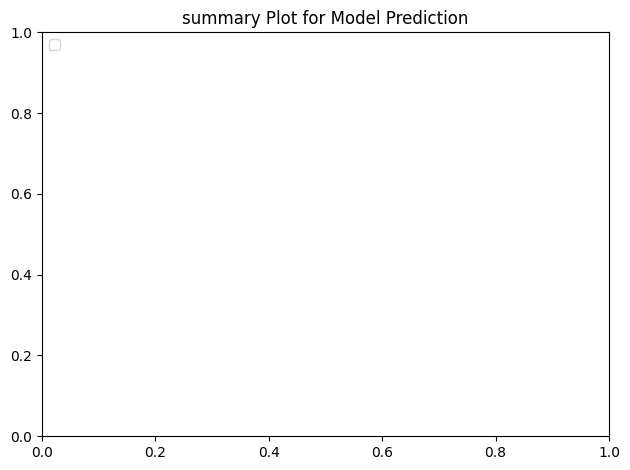

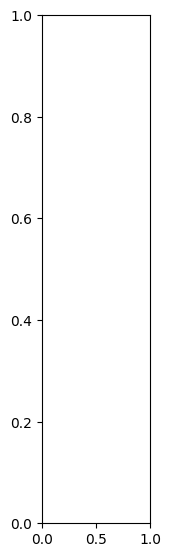

In [ ]:
import shap
import matplotlib.pyplot as plt
plt.title('summary Plot for Model Prediction')
plt.legend(loc='upper left')
plt.tight_layout()
shap.summary_plot(shap_values, sample_instance, plot_type="bar", feature_names=feature_names, show=False)
plt.show()

In [ ]:
background_summary = shap.kmeans(X_train, 8)

In [ ]:
feature_names = background_summary.cluster_centers_

AttributeError: 'DenseData' object has no attribute 'cluster_centers_'

In [ ]:
cluster_centers = background_summary.cluster_centers_

AttributeError: 'DenseData' object has no attribute 'cluster_centers_'

In [ ]:
!pip install shap --upgrade

In [ ]:
feature_names = [str(i) for i in range(len(sample_instance[0]))]

In [ ]:
feature_names = [str(i) for i in range(len(sample_instance[0]))]

import shap
import matplotlib.pyplot as plt
plt.title('summary Plot for Model Prediction')
plt.legend(loc='upper left')
plt.tight_layout()
shap.summary_plot(shap_values, sample_instance, plot_type="bar", feature_names=feature_names, show=False)
plt.show()

In [ ]:
feature_names = [str(i) for i in range(len(sample_instance[0]))]

### Confusion matrix

1097/1097 [==============================] - 6s 5ms/step


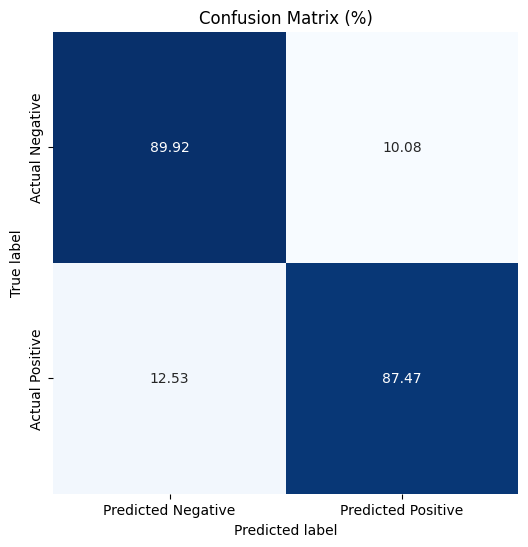

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test data
y_prob_hybrid = model_hybrid.predict([X_test_scaled, X_test_scaled])
y_pred = (y_prob_hybrid > 0.5).astype(int)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate percentages
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_percent, annot=True, cmap="Blues", fmt=".2f", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix (%)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


1097/1097 [==============================] - 5s 5ms/step


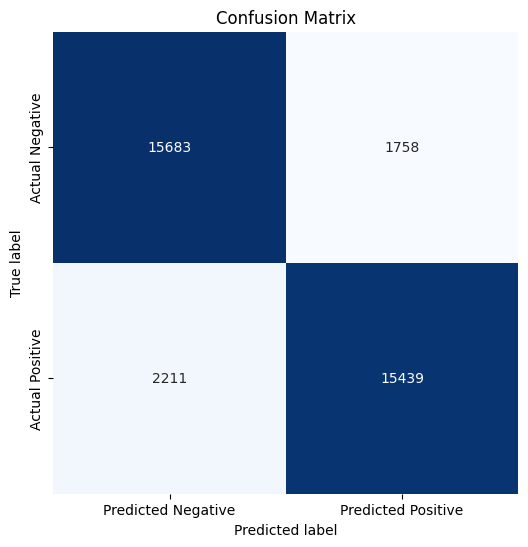

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test data
y_prob_hybrid = model_hybrid.predict([X_test_scaled, X_test_scaled])
y_pred = (y_prob_hybrid > 0.5).astype(int)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


# 10-Epochs

## ALEXNET

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from keras.optimizers import Adam
import time

# Define the AlexNet-like model
# # Reshape the input data for 1D convolution
# X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
# X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)


from keras.models import Sequential
alx_model = Sequential([
    Conv1D(128, kernel_size=5, activation='tanh', input_shape=(X_train_scaled.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(8, kernel_size=2, padding='same', activation='tanh'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(8, activation='tanh'),
    Dense(1, activation='sigmoid')
])

# Compile and train the model
# optimizer = tf.keras.optimizers.Adam(lr=1e-3)
alx_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()
alx_model.fit(X_train_scaled, y_train, epochs=10, batch_size=128, validation_split=0.2)
# Model evaluation on the test set
y_pred_alx = alx_model.predict(X_test_scaled)
y_pred = (y_pred_alx > 0.5).astype(int)

# Calculate evaluation metrics
end = time.time()
exe_time = end - start
res_accuracy = accuracy_score(y_test, y_pred)
res_precision = precision_score(y_test, y_pred)
res_recall = recall_score(y_test, y_pred)
res_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {res_accuracy}")
print(f"F1-score: {res_f1}")
print(f"Precision: {res_precision}")
print(f"Recall: {res_recall}")
print(f"Execution Time:{exe_time}")

Epoch 1/10
878/878 [==============================] - 16s 16ms/step - loss: 0.4254 - accuracy: 0.8090 - val_loss: 0.4019 - val_accuracy: 0.8203
Epoch 2/10
878/878 [==============================] - 13s 15ms/step - loss: 0.3915 - accuracy: 0.8253 - val_loss: 0.3856 - val_accuracy: 0.8267
Epoch 3/10
878/878 [==============================] - 13s 15ms/step - loss: 0.3726 - accuracy: 0.8326 - val_loss: 0.3811 - val_accuracy: 0.8276
Epoch 4/10
878/878 [==============================] - 13s 15ms/step - loss: 0.3547 - accuracy: 0.8418 - val_loss: 0.3637 - val_accuracy: 0.8351
Epoch 5/10
878/878 [==============================] - 13s 15ms/step - loss: 0.3425 - accuracy: 0.8471 - val_loss: 0.3381 - val_accuracy: 0.8492
Epoch 6/10
878/878 [==============================] - 15s 17ms/step - loss: 0.3328 - accuracy: 0.8515 - val_loss: 0.3340 - val_accuracy: 0.8490
Epoch 7/10
878/878 [==============================] - 13s 15ms/step - loss: 0.3270 - accuracy: 0.8529 - val_loss: 0.3437 - val_accuracy:

## Googlenet

In [ ]:
import time
from tensorflow.keras.layers import Conv1D, MaxPooling1D, concatenate, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the input layer
input_layer = Input(shape=(X_train_scaled.shape[1], 1))

# Define the towers (branches)
tower_1 = Conv1D(64, 1, padding='same', activation='tanh')(input_layer)
tower_2 = Conv1D(8, 1, padding='same', activation='tanh')(input_layer)
tower_2 = Conv1D(32, 3, padding='same', activation='tanh')(tower_2)
tower_3 = Conv1D(16, 1, padding='same', activation='tanh')(input_layer)
tower_3 = Conv1D(16, 5, padding='same', activation='tanh')(tower_3)
tower_4 = MaxPooling1D(3, strides=1, padding='same')(input_layer)
tower_4 = Conv1D(8, 1, padding='same', activation='tanh')(tower_4)

# Concatenate the towers
output = concatenate([tower_1, tower_2, tower_3, tower_4], axis=-1)
output = Flatten()(output)
output = Dense(16, activation='relu')(output)
output = Dense(16, activation='relu')(output)
output = Dense(4, activation='relu')(output)
output = Dropout(0.5)(output)
# output = Dense(16, activation='tanh')(output)

# Output layer for binary classification with sigmoid activation
output_layer = Dense(1, activation='sigmoid')(output)

# Build the model
custom_inception_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model for binary classification
custom_inception_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()
custom_inception_model.fit(X_train_scaled, y_train, epochs=10, batch_size=128, validation_split=0.2)
end_time = time.time()
execution_time = end_time - start_time

# Predictions and evaluation
y_train_pred = (custom_inception_model.predict(X_train_scaled) > 0.5).astype(int)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = (custom_inception_model.predict(X_test_scaled) > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# print("Training Accuracy:", train_accuracy)
print("Googlenet Accuracy:", test_accuracy)
print("Googlenet Precision:", precision)
print("Googlenet Recall:", recall)
print("Googlenet F1 Score:", f1)
print("Googlenet Execution Time:", execution_time)


Epoch 1/10
878/878 [==============================] - 16s 13ms/step - loss: 0.5791 - accuracy: 0.7538 - val_loss: 0.5065 - val_accuracy: 0.8059
Epoch 2/10
878/878 [==============================] - 10s 11ms/step - loss: 0.5352 - accuracy: 0.7691 - val_loss: 0.4438 - val_accuracy: 0.8320
Epoch 3/10
878/878 [==============================] - 11s 13ms/step - loss: 0.4669 - accuracy: 0.7942 - val_loss: 0.3598 - val_accuracy: 0.8568
Epoch 4/10
878/878 [==============================] - 11s 13ms/step - loss: 0.4353 - accuracy: 0.8044 - val_loss: 0.3434 - val_accuracy: 0.8619
Epoch 5/10
878/878 [==============================] - 11s 13ms/step - loss: 0.4195 - accuracy: 0.8113 - val_loss: 0.3315 - val_accuracy: 0.8693
Epoch 6/10
878/878 [==============================] - 11s 12ms/step - loss: 0.4202 - accuracy: 0.8112 - val_loss: 0.3387 - val_accuracy: 0.8595
Epoch 7/10
878/878 [==============================] - 10s 11ms/step - loss: 0.4144 - accuracy: 0.8142 - val_loss: 0.3340 - val_accuracy:

## alexnet-googlnet

In [ ]:
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, concatenate, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the input layer for the AlexNet model
alx_input = Input(shape=(X_train_scaled.shape[1], 1))
alx_model = tf.keras.Sequential([
    Conv1D(128, kernel_size=5, activation='tanh', input_shape=(X_train_scaled.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(8, kernel_size=2, padding='same', activation='tanh'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(8, activation='tanh'),
    Dense(1, activation='sigmoid')
])

# Extract the output tensor of the AlexNet model
alx_output = alx_model(alx_input)

# Define the input layer for the Inception model
inception_input = Input(shape=(X_train_scaled.shape[1], 1))
tower_1 = Conv1D(64, 1, padding='same', activation='tanh')(inception_input)
tower_2 = Conv1D(8, 1, padding='same', activation='tanh')(inception_input)
tower_2 = Conv1D(32, 3, padding='same', activation='tanh')(tower_2)
tower_3 = Conv1D(16, 1, padding='same', activation='tanh')(inception_input)
tower_3 = Conv1D(16, 5, padding='same', activation='tanh')(tower_3)
tower_4 = MaxPooling1D(3, strides=1, padding='same')(inception_input)
tower_4 = Conv1D(8, 1, padding='same', activation='tanh')(tower_4)

inception_output = concatenate([tower_1, tower_2, tower_3, tower_4], axis=-1)
inception_output = Flatten()(inception_output)
inception_output = Dense(16, activation='relu')(inception_output)
inception_output = Dense(16, activation='relu')(inception_output)
inception_output = Dense(4, activation='relu')(inception_output)
inception_output = Dropout(0.5)(inception_output)
output_layer = Dense(1, activation='sigmoid')(inception_output)

# Define the Inception model
inception_model = Model(inputs=inception_input, outputs=output_layer)

# Extract the output tensor of the Inception model
inception_output = inception_model(inception_input)

# Concatenate the outputs of the two models
concatenated = concatenate([alx_output, inception_output])

# Add a dense layer for further processing
final_layer_1 = Dense(64, activation='tanh')(concatenated)
final_layer = Dense(16, activation='tanh')(final_layer_1)

# Output layer
output_layer = Dense(1, activation='sigmoid')(final_layer)

# Create the hybrid model
model_hybrid = Model(inputs=[alx_input, inception_input], outputs=output_layer)

# Compile the hybrid model
# optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_hybrid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()
# Train the hybrid model
model_hybrid.fit([X_train_scaled, X_train_scaled], y_train, epochs=10, batch_size=128, validation_split=0.2)

# Make predictions on the test data
y_prob_hybrid = model_hybrid.predict([X_test_scaled, X_test_scaled])
y_pred = (y_prob_hybrid > 0.5).astype(int)

# Calculate evaluation metrics for the hybrid model
end = time.time()

exe_time = end - start
res_accuracy = accuracy_score(y_test, y_pred)
res_precision = precision_score(y_test, y_pred)
res_recall = recall_score(y_test, y_pred)
res_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {res_accuracy}")
print(f"F1-score: {res_f1}")
print(f"Precision: {res_precision}")
print(f"Recall: {res_recall}")
print(f"Execution Time: {exe_time}")


Epoch 1/10
878/878 [==============================] - 24s 23ms/step - loss: 0.4400 - accuracy: 0.8015 - val_loss: 0.4217 - val_accuracy: 0.8086
Epoch 2/10
878/878 [==============================] - 18s 20ms/step - loss: 0.4031 - accuracy: 0.8179 - val_loss: 0.3891 - val_accuracy: 0.8270
Epoch 3/10
878/878 [==============================] - 18s 20ms/step - loss: 0.3794 - accuracy: 0.8306 - val_loss: 0.3514 - val_accuracy: 0.8423
Epoch 4/10
878/878 [==============================] - 20s 23ms/step - loss: 0.3400 - accuracy: 0.8456 - val_loss: 0.3033 - val_accuracy: 0.8599
Epoch 5/10
878/878 [==============================] - 18s 20ms/step - loss: 0.3148 - accuracy: 0.8548 - val_loss: 0.3037 - val_accuracy: 0.8584
Epoch 6/10
878/878 [==============================] - 18s 20ms/step - loss: 0.3076 - accuracy: 0.8584 - val_loss: 0.2793 - val_accuracy: 0.8714
Epoch 7/10
878/878 [==============================] - 19s 22ms/step - loss: 0.3022 - accuracy: 0.8621 - val_loss: 0.2817 - val_accuracy:

# 30 Epochs

## ALEXNET

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from keras.optimizers import Adam
import time

# Define the AlexNet-like model
# # Reshape the input data for 1D convolution
# X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
# X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)


from keras.models import Sequential
alx_model = Sequential([
    Conv1D(128, kernel_size=5, activation='tanh', input_shape=(X_train_scaled.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(8, kernel_size=2, padding='same', activation='tanh'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(8, activation='tanh'),
    Dense(1, activation='sigmoid')
])

# Compile and train the model
# optimizer = tf.keras.optimizers.Adam(lr=1e-3)
alx_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()
alx_model.fit(X_train_scaled, y_train, epochs=30, batch_size=128, validation_split=0.2)
# Model evaluation on the test set
y_pred_alx = alx_model.predict(X_test_scaled)
y_pred = (y_pred_alx > 0.5).astype(int)

# Calculate evaluation metrics
end = time.time()
exe_time = end - start
res_accuracy = accuracy_score(y_test, y_pred)
res_precision = precision_score(y_test, y_pred)
res_recall = recall_score(y_test, y_pred)
res_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {res_accuracy}")
print(f"F1-score: {res_f1}")
print(f"Precision: {res_precision}")
print(f"Recall: {res_recall}")
print(f"Execution Time:{exe_time}")

Epoch 1/30
878/878 [==============================] - 21s 21ms/step - loss: 0.4275 - accuracy: 0.8066 - val_loss: 0.4062 - val_accuracy: 0.8161
Epoch 2/30
878/878 [==============================] - 25s 28ms/step - loss: 0.3958 - accuracy: 0.8215 - val_loss: 0.4035 - val_accuracy: 0.8189
Epoch 3/30
878/878 [==============================] - 24s 27ms/step - loss: 0.3793 - accuracy: 0.8302 - val_loss: 0.3807 - val_accuracy: 0.8301
Epoch 4/30
878/878 [==============================] - 18s 21ms/step - loss: 0.3640 - accuracy: 0.8376 - val_loss: 0.3729 - val_accuracy: 0.8318
Epoch 5/30
878/878 [==============================] - 14s 16ms/step - loss: 0.3529 - accuracy: 0.8426 - val_loss: 0.3498 - val_accuracy: 0.8424
Epoch 6/30
878/878 [==============================] - 14s 15ms/step - loss: 0.3413 - accuracy: 0.8470 - val_loss: 0.3441 - val_accuracy: 0.8465
Epoch 7/30
878/878 [==============================] - 13s 15ms/step - loss: 0.3348 - accuracy: 0.8499 - val_loss: 0.3417 - val_accuracy:

## Googlenet

In [ ]:
import time
from tensorflow.keras.layers import Conv1D, MaxPooling1D, concatenate, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the input layer
input_layer = Input(shape=(X_train_scaled.shape[1], 1))

# Define the towers (branches)
tower_1 = Conv1D(64, 1, padding='same', activation='tanh')(input_layer)
tower_2 = Conv1D(8, 1, padding='same', activation='tanh')(input_layer)
tower_2 = Conv1D(32, 3, padding='same', activation='tanh')(tower_2)
tower_3 = Conv1D(16, 1, padding='same', activation='tanh')(input_layer)
tower_3 = Conv1D(16, 5, padding='same', activation='tanh')(tower_3)
tower_4 = MaxPooling1D(3, strides=1, padding='same')(input_layer)
tower_4 = Conv1D(8, 1, padding='same', activation='tanh')(tower_4)

# Concatenate the towers
output = concatenate([tower_1, tower_2, tower_3, tower_4], axis=-1)
output = Flatten()(output)
output = Dense(16, activation='relu')(output)
output = Dense(16, activation='relu')(output)
output = Dense(4, activation='relu')(output)
output = Dropout(0.5)(output)
# output = Dense(16, activation='tanh')(output)

# Output layer for binary classification with sigmoid activation
output_layer = Dense(1, activation='sigmoid')(output)

# Build the model
custom_inception_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model for binary classification
custom_inception_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()
custom_inception_model.fit(X_train_scaled, y_train, epochs=30, batch_size=128, validation_split=0.2)
end_time = time.time()
execution_time = end_time - start_time

# Predictions and evaluation
y_train_pred = (custom_inception_model.predict(X_train_scaled) > 0.5).astype(int)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = (custom_inception_model.predict(X_test_scaled) > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# print("Training Accuracy:", train_accuracy)
print("Googlenet Accuracy:", test_accuracy)
print("Googlenet Precision:", precision)
print("Googlenet Recall:", recall)
print("Googlenet F1 Score:", f1)
print("Googlenet Execution Time:", execution_time)


Epoch 1/30
878/878 [==============================] - 14s 12ms/step - loss: 0.5163 - accuracy: 0.7255 - val_loss: 0.4174 - val_accuracy: 0.8109
Epoch 2/30
878/878 [==============================] - 12s 14ms/step - loss: 0.4837 - accuracy: 0.7369 - val_loss: 0.4068 - val_accuracy: 0.8206
Epoch 3/30
878/878 [==============================] - 12s 14ms/step - loss: 0.4643 - accuracy: 0.7463 - val_loss: 0.3559 - val_accuracy: 0.8416
Epoch 4/30
878/878 [==============================] - 12s 14ms/step - loss: 0.4186 - accuracy: 0.7630 - val_loss: 0.3194 - val_accuracy: 0.8598
Epoch 5/30
878/878 [==============================] - 12s 14ms/step - loss: 0.4022 - accuracy: 0.7675 - val_loss: 0.2938 - val_accuracy: 0.8582
Epoch 6/30
878/878 [==============================] - 13s 15ms/step - loss: 0.3944 - accuracy: 0.7714 - val_loss: 0.2845 - val_accuracy: 0.8630
Epoch 7/30
878/878 [==============================] - 12s 14ms/step - loss: 0.3910 - accuracy: 0.7707 - val_loss: 0.2838 - val_accuracy:

## alexnet-googlnet

In [ ]:
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, concatenate, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the input layer for the AlexNet model
alx_input = Input(shape=(X_train_scaled.shape[1], 1))
alx_model = tf.keras.Sequential([
    Conv1D(128, kernel_size=5, activation='tanh', input_shape=(X_train_scaled.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(8, kernel_size=2, padding='same', activation='tanh'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(8, activation='tanh'),
    Dense(1, activation='sigmoid')
])

# Extract the output tensor of the AlexNet model
alx_output = alx_model(alx_input)

# Define the input layer for the Inception model
inception_input = Input(shape=(X_train_scaled.shape[1], 1))
tower_1 = Conv1D(64, 1, padding='same', activation='tanh')(inception_input)
tower_2 = Conv1D(8, 1, padding='same', activation='tanh')(inception_input)
tower_2 = Conv1D(32, 3, padding='same', activation='tanh')(tower_2)
tower_3 = Conv1D(16, 1, padding='same', activation='tanh')(inception_input)
tower_3 = Conv1D(16, 5, padding='same', activation='tanh')(tower_3)
tower_4 = MaxPooling1D(3, strides=1, padding='same')(inception_input)
tower_4 = Conv1D(8, 1, padding='same', activation='tanh')(tower_4)

inception_output = concatenate([tower_1, tower_2, tower_3, tower_4], axis=-1)
inception_output = Flatten()(inception_output)
inception_output = Dense(16, activation='relu')(inception_output)
inception_output = Dense(16, activation='relu')(inception_output)
inception_output = Dense(4, activation='relu')(inception_output)
inception_output = Dropout(0.5)(inception_output)
output_layer = Dense(1, activation='sigmoid')(inception_output)

# Define the Inception model
inception_model = Model(inputs=inception_input, outputs=output_layer)

# Extract the output tensor of the Inception model
inception_output = inception_model(inception_input)

# Concatenate the outputs of the two models
concatenated = concatenate([alx_output, inception_output])

# Add a dense layer for further processing
final_layer_1 = Dense(64, activation='tanh')(concatenated)
final_layer = Dense(16, activation='tanh')(final_layer_1)

# Output layer
output_layer = Dense(1, activation='sigmoid')(final_layer)

# Create the hybrid model
model_hybrid = Model(inputs=[alx_input, inception_input], outputs=output_layer)

# Compile the hybrid model
# optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_hybrid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()
# Train the hybrid model
model_hybrid.fit([X_train_scaled, X_train_scaled], y_train, epochs=30, batch_size=128, validation_split=0.2)

# Make predictions on the test data
y_prob_hybrid = model_hybrid.predict([X_test_scaled, X_test_scaled])
y_pred = (y_prob_hybrid > 0.5).astype(int)

# Calculate evaluation metrics for the hybrid model
end = time.time()

exe_time = end - start
res_accuracy = accuracy_score(y_test, y_pred)
res_precision = precision_score(y_test, y_pred)
res_recall = recall_score(y_test, y_pred)
res_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {res_accuracy}")
print(f"F1-score: {res_f1}")
print(f"Precision: {res_precision}")
print(f"Recall: {res_recall}")
print(f"Execution Time: {exe_time}")


Epoch 1/30
878/878 [==============================] - 26s 24ms/step - loss: 0.4335 - accuracy: 0.8046 - val_loss: 0.4044 - val_accuracy: 0.8188
Epoch 2/30
878/878 [==============================] - 22s 26ms/step - loss: 0.3957 - accuracy: 0.8217 - val_loss: 0.3776 - val_accuracy: 0.8337
Epoch 3/30
878/878 [==============================] - 20s 22ms/step - loss: 0.3777 - accuracy: 0.8315 - val_loss: 0.3707 - val_accuracy: 0.8336
Epoch 4/30
878/878 [==============================] - 22s 25ms/step - loss: 0.3631 - accuracy: 0.8382 - val_loss: 0.3499 - val_accuracy: 0.8469
Epoch 5/30
878/878 [==============================] - 19s 22ms/step - loss: 0.3453 - accuracy: 0.8455 - val_loss: 0.3737 - val_accuracy: 0.8287
Epoch 6/30
878/878 [==============================] - 19s 22ms/step - loss: 0.3242 - accuracy: 0.8549 - val_loss: 0.3152 - val_accuracy: 0.8553
Epoch 7/30
878/878 [==============================] - 21s 24ms/step - loss: 0.3087 - accuracy: 0.8606 - val_loss: 0.2998 - val_accuracy:

## K-FCV

In [ ]:
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, concatenate, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X_train_scaled, X_test_scaled, y_train, and y_test are already defined

# Reshape the input data to add a channel dimension
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Define the hybrid model architecture
def build_hybrid_model(input_shape):
    # Define the input layers for the two sub-models
    alx_input = Input(shape=input_shape)
    inception_input = Input(shape=input_shape)

    # Define the architecture for the AlexNet model
    alx_model = tf.keras.Sequential([
        Conv1D(128, kernel_size=5, activation='tanh', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Conv1D(64, kernel_size=3, padding='same', activation='relu'),
        MaxPooling1D(pool_size=2),
        Conv1D(4, kernel_size=2, padding='same', activation='tanh'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(32, activation='tanh'),
        Dense(16, activation='tanh'),
        Dense(16, activation='tanh'),
        Dense(4, activation='tanh'),
        Dense(1, activation='sigmoid')
    ])

    # Define the architecture for the Inception model
    tower_1 = Conv1D(128, 1, padding='same', activation='relu')(inception_input)
    tower_2 = Conv1D(64, 1, padding='same', activation='tanh')(inception_input)
    tower_2 = Conv1D(64, 3, padding='same', activation='tanh')(tower_2)
    tower_3 = Conv1D(16, 1, padding='same', activation='tanh')(inception_input)
    tower_3 = Conv1D(16, 5, padding='same', activation='tanh')(tower_3)
    tower_4 = MaxPooling1D(3, strides=1, padding='same')(inception_input)
    tower_4 = Conv1D(8, 1, padding='same', activation='tanh')(tower_4)

    inception_output = concatenate([tower_1, tower_2, tower_3, tower_4], axis=-1)
    inception_output = Flatten()(inception_output)
    inception_output = Dense(16, activation='tanh')(inception_output)
    inception_output = Dense(16, activation='tanh')(inception_output)
    inception_output = Dense(4, activation='tanh')(inception_output)
    inception_output = Dropout(0.5)(inception_output)
    output_layer = Dense(1, activation='sigmoid')(inception_output)

    # Define the hybrid model
    concatenated = concatenate([alx_model(alx_input), output_layer])
    final_layer_1 = Dense(32, activation='tanh')(concatenated)
    final_layer = Dense(16, activation='tanh')(final_layer_1)
    output_layer = Dense(1, activation='sigmoid')(final_layer)
    model_hybrid = Model(inputs=[alx_input, inception_input], outputs=output_layer)

    return model_hybrid

# Define K-fold cross-validation
k_folds = 10
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Define lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

start = time.time()

# Perform K-fold cross-validation
for fold, (train_indices, val_indices) in enumerate(kf.split(X_train_scaled)):
    print(f'Fold {fold+1}/{k_folds}')

    # Get the data for this fold
    X_train_fold = [X_train_scaled[train_indices], X_train_scaled[train_indices]]
    y_train_fold = y_train[train_indices]
    X_val_fold = [X_train_scaled[val_indices], X_train_scaled[val_indices]]
    y_val_fold = y_train[val_indices]

    # Build the hybrid model
    model_hybrid = build_hybrid_model(input_shape=X_train_scaled.shape[1:])

    # Compile the model
    model_hybrid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model_hybrid.fit(X_train_fold, y_train_fold, epochs=30, batch_size=128, validation_data=(X_val_fold, y_val_fold))

    # Evaluate the model on the validation data
    y_pred = (model_hybrid.predict(X_val_fold) > 0.5).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred)
    recall = recall_score(y_val_fold, y_pred)
    f1 = f1_score(y_val_fold, y_pred)

    # Store the evaluation metrics for this fold
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    print(f"Accuracy: {accuracy}")
    print(f"F1-score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")

# Calculate average evaluation metrics across all folds
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

end = time.time()
exe_time = end - start

# Print average evaluation metrics
print("\nAverage Evaluation Metrics Across All Folds:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average F1-score: {avg_f1}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Total Execution Time: {exe_time}")


Fold 1/10
Epoch 1/30
987/987 [==============================] - 67s 49ms/step - loss: 0.4328 - accuracy: 0.8083 - val_loss: 0.3704 - val_accuracy: 0.8290
Epoch 2/30
987/987 [==============================] - 26s 26ms/step - loss: 0.3402 - accuracy: 0.8435 - val_loss: 0.2928 - val_accuracy: 0.8662
Epoch 3/30
987/987 [==============================] - 26s 26ms/step - loss: 0.3118 - accuracy: 0.8550 - val_loss: 0.2810 - val_accuracy: 0.8702
Epoch 4/30
987/987 [==============================] - 26s 27ms/step - loss: 0.2952 - accuracy: 0.8629 - val_loss: 0.2676 - val_accuracy: 0.8760
Epoch 5/30
987/987 [==============================] - 24s 25ms/step - loss: 0.2889 - accuracy: 0.8649 - val_loss: 0.2736 - val_accuracy: 0.8708
Epoch 6/30
987/987 [==============================] - 26s 26ms/step - loss: 0.2835 - accuracy: 0.8677 - val_loss: 0.2621 - val_accuracy: 0.8788
Epoch 7/30
987/987 [==============================] - 26s 26ms/step - loss: 0.2807 - accuracy: 0.8696 - val_loss: 0.2591 - val

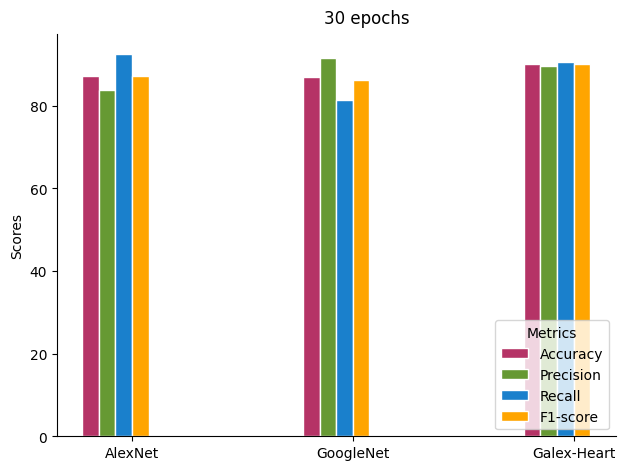

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the variables
models = ['AlexNet', 'GoogleNet', 'Galex-Heart']
accuracy = [87.29, 86.93, 90.00]
precision = [83.76, 91.55, 89.56]
recall = [92.63, 81.50, 90.66]
f1_score = [87.10, 86.23, 90.11]

# Set width of bar
barWidth = 0.15

# Set position of bar on X axis with added distance
r1 = np.arange(len(models)) * 2
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Define custom CSS colors
css_colors = [(0.71, 0.2, 0.4), (0.4, 0.6, 0.2), (0.1, 0.5, 0.8)]  # Custom CSS colors

# Make the plot
plt.figure(facecolor='white')  # Set background color to white
bars1 = plt.bar(r1, accuracy, color=css_colors[0], width=barWidth, edgecolor='white', label='Accuracy')
bars2 = plt.bar(r2, precision, color=css_colors[1], width=barWidth, edgecolor='white', label='Precision')
bars3 = plt.bar(r3, recall, color=css_colors[2], width=barWidth, edgecolor='white', label='Recall')
bars4 = plt.bar(r4, f1_score, color='orange', width=barWidth, edgecolor='white', label='F1-score')

# Add xticks on the middle of the group bars
# plt.xlabel('Models', position=(0.5, 1.08), fontweight='normal')  # Simplified x-axis label with normal font weight
plt.xticks([r + 1.5 * barWidth for r in r2], models, rotation=0, ha='center')

# Label y axis with 'Scores'
plt.ylabel('Scores', position=(0, 0.5))

# Create legend with box in the bottom right corner
plt.legend(loc='lower right', bbox_to_anchor=(1, 0), title='Metrics')

# Hide the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add model label on top of the graph
plt.text(2.5, 100, '30 epochs', ha='center', fontsize=12)

# Show graphic
plt.tight_layout()
plt.show()


# AUC-ROC curve

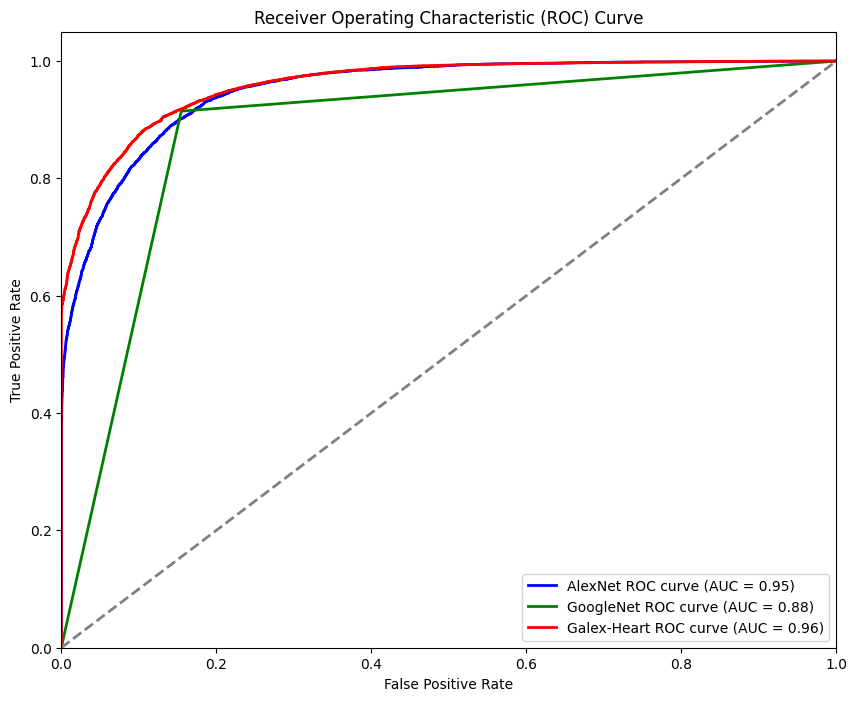

In [ ]:
# Calculate ROC curve and AUC for AlexNet-like model
fpr_alx, tpr_alx, thresholds_alx = roc_curve(y_test, y_pred_alx)
roc_auc_alx = auc(fpr_alx, tpr_alx)

# Calculate ROC curve and AUC for Inception model
fpr_inception, tpr_inception, thresholds_inception = roc_curve(y_test, y_test_pred)
roc_auc_inception = auc(fpr_inception, tpr_inception)

# Calculate ROC curve and AUC for Hybrid model
fpr_hybrid, tpr_hybrid, thresholds_hybrid = roc_curve(y_test, y_prob_hybrid)
roc_auc_hybrid = auc(fpr_hybrid, tpr_hybrid)

# Plot all ROC curves in one graph
plt.figure(figsize=(10, 8))
plt.plot(fpr_alx, tpr_alx, color='blue', lw=2, label='AlexNet ROC curve (AUC = %0.2f)' % roc_auc_alx)
plt.plot(fpr_inception, tpr_inception, color='green', lw=2, label='GoogleNet ROC curve (AUC = %0.2f)' % roc_auc_inception)
plt.plot(fpr_hybrid, tpr_hybrid, color='red', lw=2, label='Galex-Heart ROC curve (AUC = %0.2f)' % roc_auc_hybrid)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


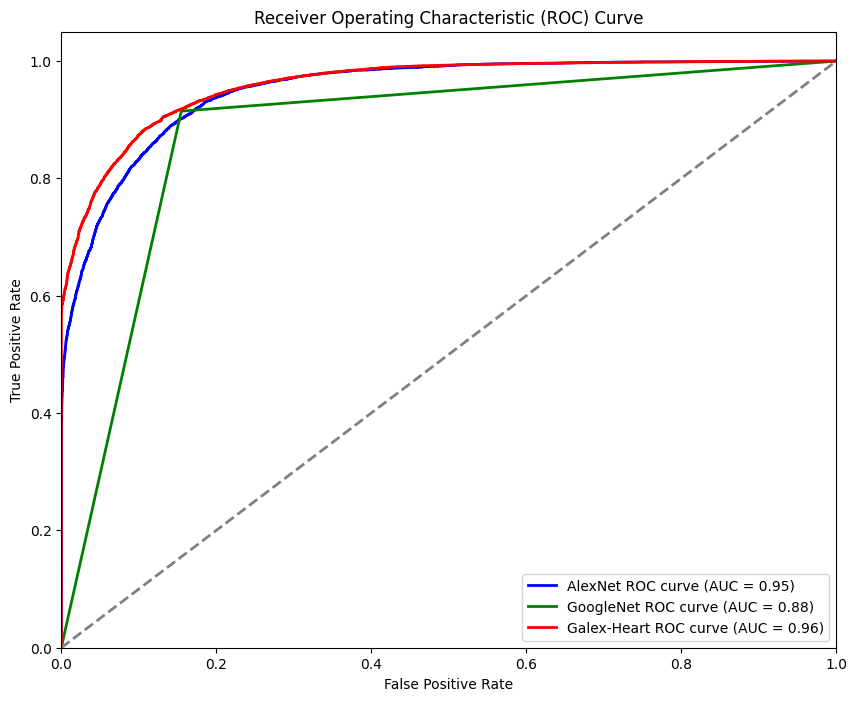

In [ ]:
# Calculate ROC curve and AUC for AlexNet-like model
fpr_alx, tpr_alx, thresholds_alx = roc_curve(y_test, y_pred_alx)
roc_auc_alx = auc(fpr_alx, tpr_alx)

# Calculate ROC curve and AUC for Inception model
fpr_inception, tpr_inception, thresholds_inception = roc_curve(y_test, y_test_pred)
roc_auc_inception = auc(fpr_inception, tpr_inception)

# Calculate ROC curve and AUC for Hybrid model
fpr_hybrid, tpr_hybrid, thresholds_hybrid = roc_curve(y_test, y_prob_hybrid)
roc_auc_hybrid = auc(fpr_hybrid, tpr_hybrid)

# Plot all ROC curves in one graph
plt.figure(figsize=(10, 8))
plt.plot(fpr_alx, tpr_alx, color='blue', lw=2, label='AlexNet ROC curve (AUC = %0.2f)' % roc_auc_alx)
plt.plot(fpr_inception, tpr_inception, color='green', lw=2, label='GoogleNet ROC curve (AUC = %0.2f)' % roc_auc_inception)
plt.plot(fpr_hybrid, tpr_hybrid, color='red', lw=2, label='Galex-Heart ROC curve (AUC = %0.2f)' % roc_auc_hybrid)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


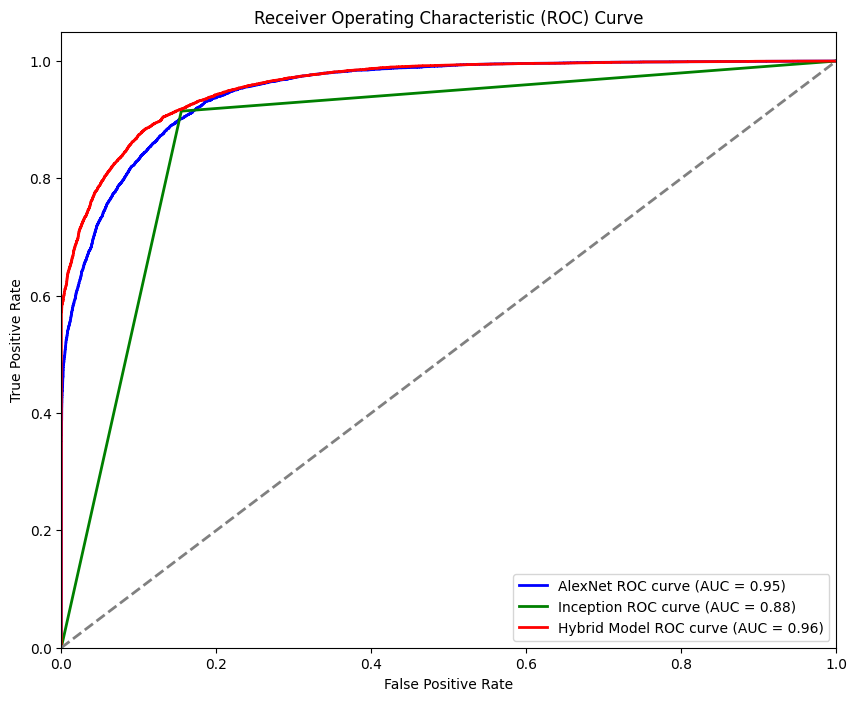

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC for AlexNet-like model
fpr_alx, tpr_alx, thresholds_alx = roc_curve(y_test, y_pred_alx)
roc_auc_alx = auc(fpr_alx, tpr_alx)

# Calculate ROC curve and AUC for Inception model
fpr_inception, tpr_inception, thresholds_inception = roc_curve(y_test, y_test_pred)
roc_auc_inception = auc(fpr_inception, tpr_inception)

# Calculate ROC curve and AUC for Hybrid model
fpr_hybrid, tpr_hybrid, thresholds_hybrid = roc_curve(y_test, y_prob_hybrid)
roc_auc_hybrid = auc(fpr_hybrid, tpr_hybrid)

# Plot all ROC curves in one graph
plt.figure(figsize=(10, 8))
plt.plot(fpr_alx, tpr_alx, color='blue', lw=2, label='AlexNet ROC curve (AUC = %0.2f)' % roc_auc_alx)
plt.plot(fpr_inception, tpr_inception, color='green', lw=2, label='Inception ROC curve (AUC = %0.2f)' % roc_auc_inception)
plt.plot(fpr_hybrid, tpr_hybrid, color='red', lw=2, label='Hybrid Model ROC curve (AUC = %0.2f)' % roc_auc_hybrid)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Bar graph

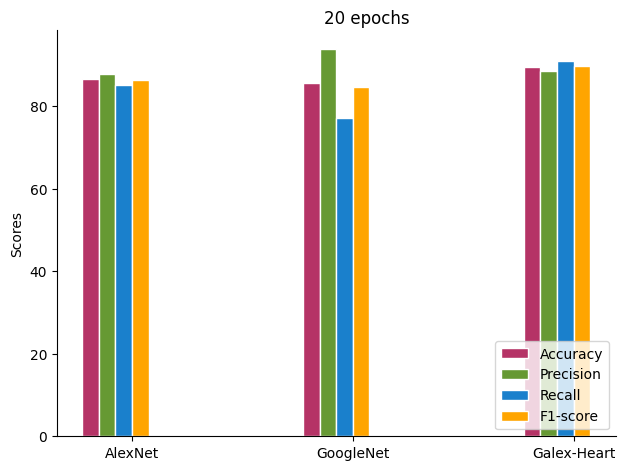

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the variables
models = ['AlexNet', 'GoogleNet', 'Galex-Heart']
accuracy = [86.47, 85.47, 89.46]
precision = [87.74, 93.81, 88.53]
recall = [84.99, 77.16, 90.79]
f1_score = [86.34, 84.68, 89.65]

# Set width of bar
barWidth = 0.15

# Set position of bar on X axis with added distance
r1 = np.arange(len(models)) * 2
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Define custom CSS colors
css_colors = [(0.71, 0.2, 0.4), (0.4, 0.6, 0.2), (0.1, 0.5, 0.8)]  # Custom CSS colors

# Make the plot
plt.figure(facecolor='white')  # Set background color to white
bars1 = plt.bar(r1, accuracy, color=css_colors[0], width=barWidth, edgecolor='white', label='Accuracy')
bars2 = plt.bar(r2, precision, color=css_colors[1], width=barWidth, edgecolor='white', label='Precision')
bars3 = plt.bar(r3, recall, color=css_colors[2], width=barWidth, edgecolor='white', label='Recall')
bars4 = plt.bar(r4, f1_score, color='orange', width=barWidth, edgecolor='white', label='F1-score')

# Add xticks on the middle of the group bars
# plt.xlabel('Models', position=(0.5, 1.08), fontweight='normal')  # Simplified x-axis label with normal font weight
plt.xticks([r + 1.5 * barWidth for r in r2], models, rotation=0, ha='center')

# Label y axis with 'Scores'
plt.ylabel('Scores', position=(0, 0.5))

# Create legend with box in the bottom right corner
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

# Hide the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add model label on top of the graph
plt.text(2.5, 100, '20 epochs', ha='center', fontsize=12)

# Show graphic
plt.tight_layout()
plt.show()


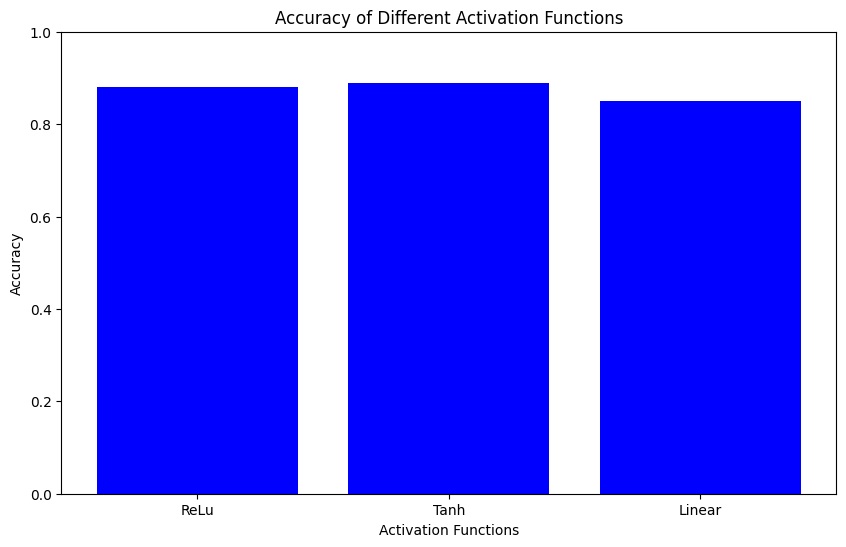

In [ ]:
# Activation functions and their corresponding accuracies
activation_functions = ['ReLu', 'Tanh', 'Linear']
activation_ablation_accuracies = [0.88, 0.89, 0.85]  # Example accuracies

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(activation_functions, activation_ablation_accuracies, color=['blue', 'blue', 'blue'])
plt.xlabel('Activation Functions')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Activation Functions')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.show()